In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn

In [ ]:
df1 = pd.read_excel('Sylhet Water Level and Rainfall.xlsx', sheet_name=0)
df2 = df1.drop('Raw', axis = 1)
df1.head()
# df1.dtypes

,Date,Raw,Corrected mPWD
0,1980-01-01 12:00:00,3.18,2.57
1,1980-01-02 12:00:00,3.17,2.56
2,1980-01-03 12:00:00,3.15,2.54
3,1980-01-04 12:00:00,3.13,2.52
4,1980-01-05 12:00:00,3.12,2.51


In [ ]:
df2['Year'] = df2['Date'].dt.strftime('%Y')
df2.head()

,Date,Corrected mPWD,Year
0,1980-01-01 12:00:00,2.57,1980
1,1980-01-02 12:00:00,2.56,1980
2,1980-01-03 12:00:00,2.54,1980
3,1980-01-04 12:00:00,2.52,1980
4,1980-01-05 12:00:00,2.51,1980


In [ ]:
WL_df1= df2.loc[df2.reset_index().groupby(['Year'])['Corrected mPWD'].idxmax()]
WL_df2 = WL_df1.drop('Date', axis = 1)
WL_df2.rename(columns = {'Corrected mPWD':'Water Level'}, inplace = True)
WL_df2['Year'] = pd.to_numeric(WL_df2['Year'], errors='coerce')
print("Result:\n",WL_df2)
WL_df2.to_excel("annual_peak_WL.xlsx")

Result:
        Water Level  Year
200           9.78  1980
577          10.53  1981
920          10.61  1982
1333         10.71  1983
1604         10.94  1984
1984         10.45  1985
2475         10.27  1986
2769         10.96  1987
3110         11.33  1988
3499         10.72  1989
3812         10.58  1990
4150         10.85  1991
4570         10.69  1992
4919         10.94  1993
5525         10.55  1994
7414         11.03  1995
9369         10.78  1996
10795        10.87  1997
12469        11.36  1998
14448        10.64  1999
16386        10.50  2000
18196        10.78  2001
19228        10.61  2002
20937        10.88  2003
22858        11.83  2004
24691        10.46  2005
26333        10.99  2006
28565        11.21  2007
30341        10.89  2008
32119        10.62  2009
33581        10.93  2010
35546        10.29  2011
37314        11.36  2012
39398         9.97  2013
41261        10.74  2014
43119        11.15  2015
44760        10.66  2016
46687        11.09  2017
48222        11.

In [ ]:
rainfall_df1 = pd.read_excel('annual_peak_rainfall_sylhet.xlsx', sheet_name=1)
rainfall_df1['Year'] = pd.to_numeric(rainfall_df1['Year'], errors='coerce')
rainfall_df1.head()

,Year,Rainfall
0,1957,148.5
1,1958,238.5
2,1959,90.9
3,1960,7.4
4,1961,156.0


In [ ]:
rainfall_WL_merged_data = pd.merge(WL_df2,rainfall_df1, how = 'inner', on ='Year')
# rainfall_WL_merged_data.rename(columns = {'Corrected mPWD':'Water Level'}, inplace = True)
rainfall_WL_merged_data  = rainfall_WL_merged_data .dropna() 
rainfall_WL_merged_data.head()
# rainfall_WL_merged_data.tail()

,Water Level,Year,Rainfall
0,9.78,1980,191.8
1,10.53,1981,203.2
2,10.61,1982,162.6
3,10.71,1983,210.8
4,10.94,1984,436.9


In [ ]:
# rainfall_WL_merged_data.to_excel("annual_peak_rainfall_WL_merged_data.xlsx")
rainfall_WL_merged_data1= pd.read_excel('annual_peak_rainfall_WL_merged_data.xlsx', sheet_name=0)
rainfall_WL_merged_data1.head()

,Unnamed: 0,Water Level,Year,Rainfall
0,0,0.00,1979,0.0
1,1,9.78,1980,191.8
2,2,10.53,1981,203.2
3,3,10.61,1982,162.6
4,4,10.71,1983,210.8


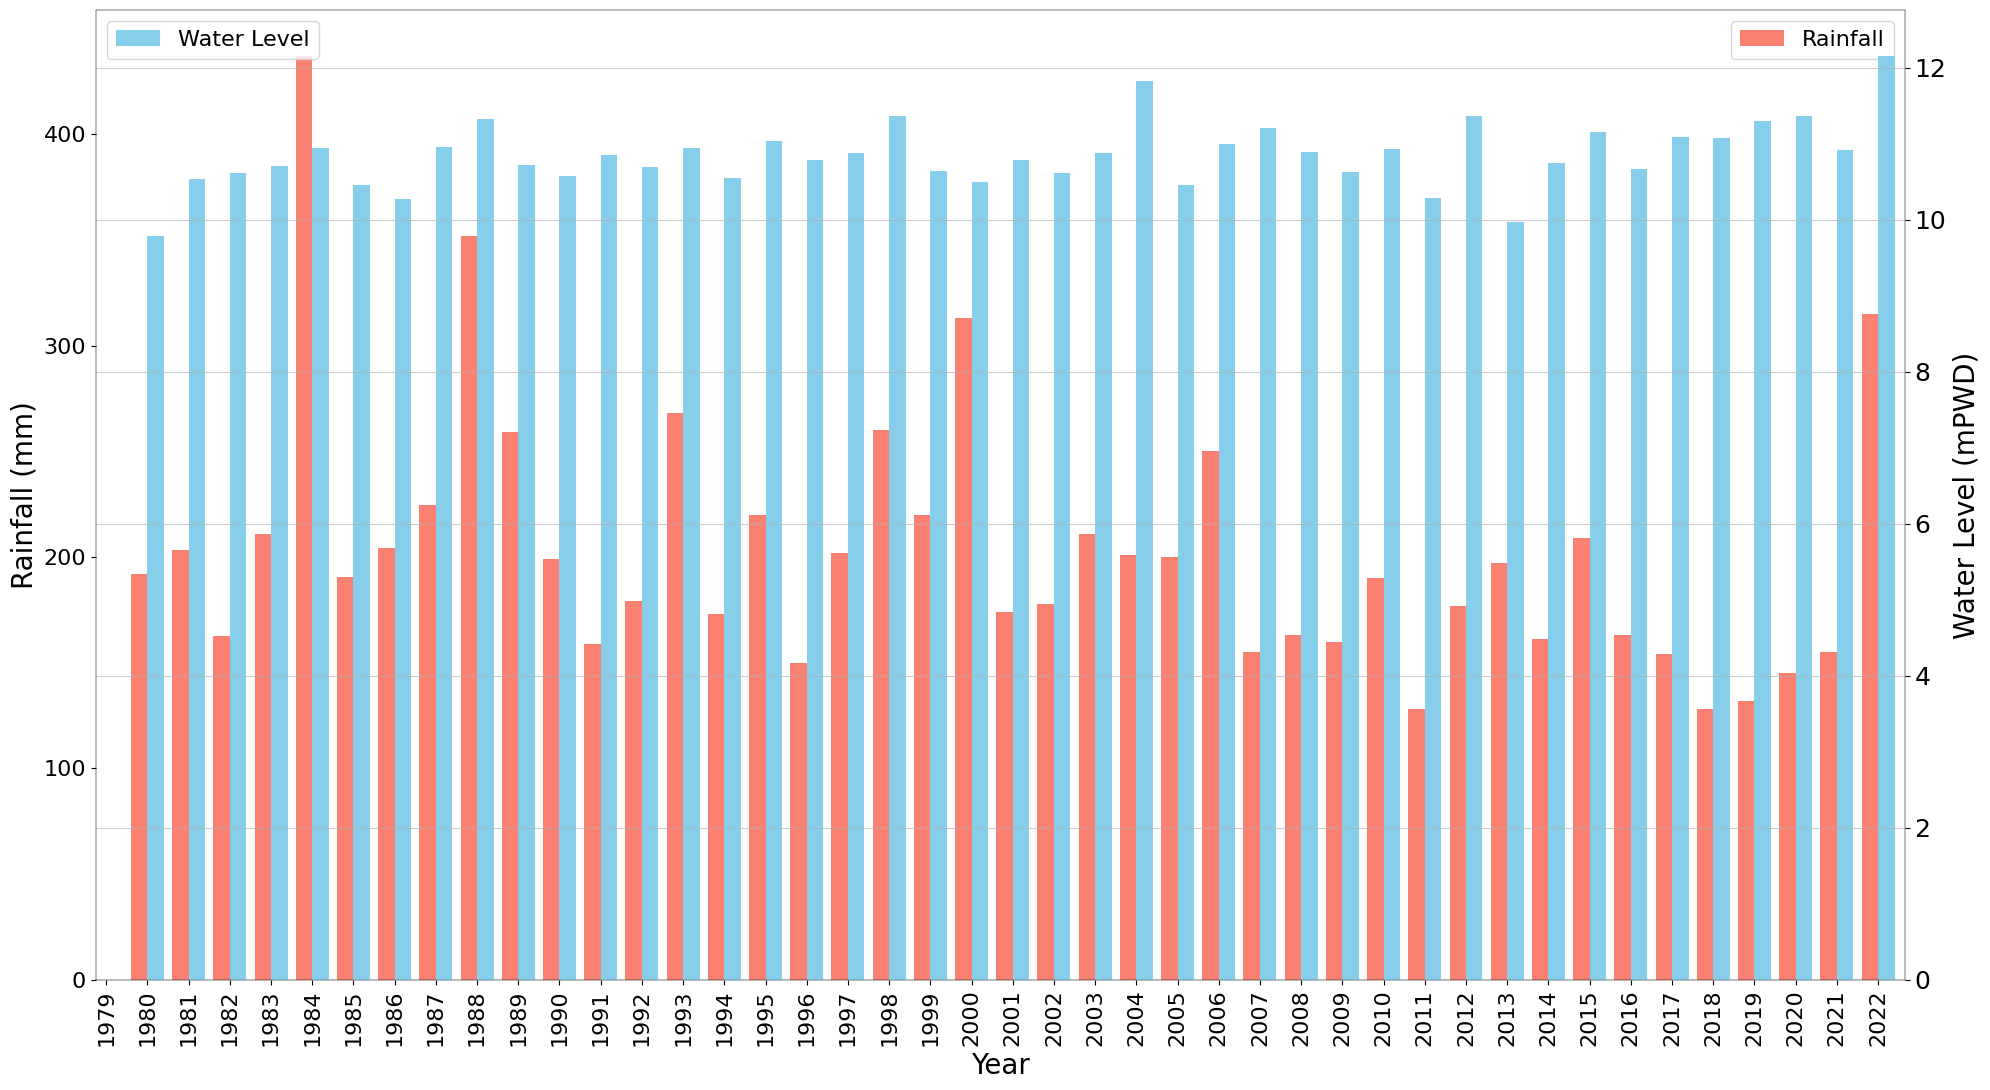

In [ ]:
plt.rcParams["figure.figsize"] = [20,11]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4


rainfall_WL_merged_data1.plot(x= 'Year', y=['Rainfall'],kind="bar", fontsize=16, color='salmon', ax=ax, width=width, position=1)
rainfall_WL_merged_data1.plot(x= 'Year', y=['Water Level'],kind="bar", fontsize=16, color='skyblue', ax=ax2, width=width, position=0)

# df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
# df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
ax.set_ylabel('Rainfall (mm)',fontsize=20)
ax2.set_ylabel('Water Level (mPWD)',fontsize=20)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

handles1, labels1 = ax.get_legend_handles_labels()
handles, labels = ax2.get_legend_handles_labels()
ax.legend(handles1, labels1,fontsize=16 )
ax2.legend(handles, labels,fontsize=16 )

plt.tight_layout()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0.2)
for location in ['left', 'right', 'top', 'bottom']:
    ax2.spines[location].set_linewidth(0.2)
plt.savefig("Annual Peak Water Level and Rainfall 1980-2022.png", dpi=500)

In [ ]:
# rainfall_WL_merged_data.plot( kind= 'bar' , secondary_y= 'Rainfall' , rot= 0 )
# plt.show()